# STAT 207 Project 02 - Student's Social Media Addiction

Kendall Gruenenfelder, Lahari Anantha, Livia Lin

<hr>

### Contribution Report

Should we grade your submission?  If not, write the netID of the submission to be graded.  (Note: We will only grade one assignment per group, and we'll pick the first one that says we should grade that submission.  We will assign the same grade to all team members.)

*For example*, you might respond: **grade this submission** or **my submission is under netID jdeeke**

grade this submission

If you said **my submission is under netID** above, we will not grade any of your project submission.

If you said **grade this submission** above, who worked with you on this project?  Write both their **names** and **netIDs**.  

Lahari Anantha (laharia2) and Livia Lin (llin55)

You should list the contribution of each team member to the report.

*For example:*

*John Smith (smith92) & Jane Doe (doe105) worked together on all parts of this project*

OR

<i>1. John Smith (smith92) completed parts 1 - 3</i>

<i>2. Jane Doe (doe105) completed parts 4 - 5</i>

<i>We both reviewed the full document before submission.</i>

Kendall Gruenenfelder (krg6), Livia Lin (llin55), and Lahari Anantha (laharia2) worked together on all parts of this project. 

Group Work Reflection

Reflecting on your experience working as a group, how do you think the project went?  What were the most effective things your group did to work together?  What were the least effective things your group did to work together?  What have you learned about group work from the last project?  What might you change about your group's process or dynamics for the next project?  Did you face any substantial challenges in working together?  If so, please explain any challenges that you had.

*Note*: this can be completed individually or as a group, and each person can submit their own reflection to their own repository/submission or completely within the group submission.  If you would like your TA to read your individual reflection and yours is not the submission to be graded, be sure to email your TA.

The project went well. We made a shared doc and crossed off things as we went through. The shared doc was helpful because we could write our own input and look at what each other answered, then add accordingly to the project. We met up multiple times in person to work together on all parts. We do not have anything that we would change about our process or dynamic for the next project. We did not face any substantial challenges in working together. 

## 1. Introduction

Part A

Students’ Social Media Addiction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv("Students Social Media Addiction.csv")

Part B

The dataset “Student Social Media Addiction” anonymously examines students’ social media habits. This includes their most used platform or their average daily usage, and how they affect various areas of their lives, such as the hours of sleep they get or their mental health status. 

Part C

Our data represents a sample of students aged 16-25 across multiple countries that were surveyed. Our corresponding population of interest is all students aged 16-25 across all countries. 

Part D

“What is the proportion of students that feel social media affects their academic performance in the dataset? What is a range of reasonable values for the proportion of students who feel their social media use affects their academic performance in the underlying population of all students aged 16-25?” & “What is the mean number of hours per day that surveyed students spend on social media platforms? Does the data in my sample support that the population mean number of hours per day that all students aged 16-25 spend on social media platforms is more than 5 hours?”

Part E

Social media is increasingly affecting the lives of many people, especially young people who are typically students. Being able to quantify how worldwide students are affected by social media could help young people. Take for example, if schools realize that spending a lot of time on social media platforms like Instagram led to mental health decline or affected studies, they could move announcements from a school’s Instagram page to another outlet like their website or weekly emails. 

## 2. Confidence Interval Analytical Tasks

Part A

“What is the proportion of students that feel social media affects their academic performance in the dataset? What is a range of reasonable values for the proportion of students who feel their social media use affects their academic performance in the underlying population of all students aged 16-25?”

Part B

In [3]:
df["Affects_Academic_Performance"].unique()

array(['Yes', 'No'], dtype=object)

Using df[“Affects_Academic_Performance”].unique(), we only found the values Yes and No. Seeing as there were no other values, we did not need to clean our data further.

Part C

In [4]:
len(df)

705

In [5]:
df["Affects_Academic_Performance"].describe()

count     705
unique      2
top       Yes
freq      453
Name: Affects_Academic_Performance, dtype: object

Our sample size is 705. We only have two unique values for our “Affects Academic Performance” variable, which are “Yes” and “No”. “Yes” is the most common answer, with a frequency of 453. 

Part D

90% confidence level

In [6]:
sampling_dist = []
for i in range(1000):
    sample = df.sample(705, replace = True)
    sampling_dist.append(len(sample[sample["Affects_Academic_Performance"] == "Yes"])/len(sample))
sampling_dist = pd.DataFrame({"x" : sampling_dist})
sampling_dist

,x
0,0.609929
1,0.608511
2,0.651064
3,0.626950
4,0.617021
...,...
995,0.624113
996,0.639716
997,0.641135
998,0.611348


In [7]:
print(sampling_dist["x"].quantile(0.05))
print(sampling_dist["x"].quantile(0.95))

0.6141843971631206
0.6737588652482269


Our 90% confidence interval is (0.614, 0.672). 

Part E

I am 90% confident that the population proportion of all students who believe that their usage of social media affects their academic performance falls in the range (0.614, 0.672). 

## 3. Hypothesis Testing Analytical Tasks

Part A

“What is the mean number of hours per day that surveyed students spend on social media platforms? Does the data in my sample support that the population mean number of hours per day that all students aged 16-25 spend on social media platforms is more than 5 hours?”

Part B

In [8]:
df["Avg_Daily_Usage_Hours"].unique()

array([5.2, 2.1, 6. , 3. , 4.5, 7.2, 1.5, 5.8, 4. , 3.3, 4.8, 5.5, 2.8,
       6.5, 3.7, 4.2, 2. , 5. , 3.5, 4.7, 5.3, 2.5, 4.9, 5.7, 3.2, 6.1,
       3.8, 4.4, 2.2, 5.9, 3.6, 5.4, 2.6, 5.6, 3.1, 6.2, 3.9, 2.3, 4.6,
       2.7, 6.3, 2.4, 2.9, 5.1, 4.3, 4.1, 3.4, 6.4, 7. , 6.8, 6.9, 6.7,
       6.6, 7.1, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3,
       8.4, 8.5])

Using df[“Avg_Daily_Usage_Hours”].unique(), we only found that there were no implied missing values. All unique values seemed to be logical so we did no further data cleaning.

Part C

In [9]:
df["Avg_Daily_Usage_Hours"].describe()

count    705.000000
mean       4.918723
std        1.257395
min        1.500000
25%        4.100000
50%        4.800000
75%        5.800000
max        8.500000
Name: Avg_Daily_Usage_Hours, dtype: float64

<Axes: title={'center': 'Average Daily Social Media Usage Hours'}, xlabel='Average Daily Usage Hours', ylabel='Frequency'>

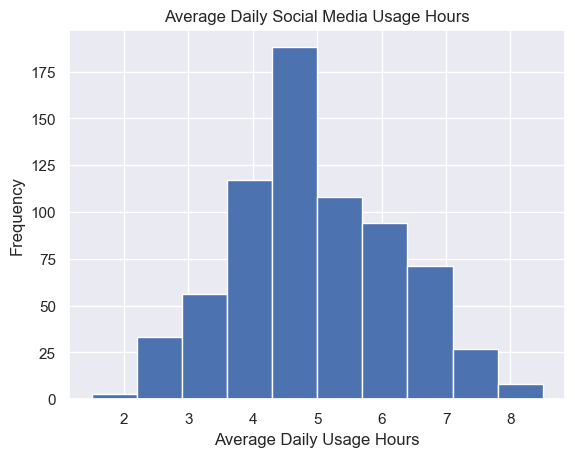

In [10]:
df["Avg_Daily_Usage_Hours"].plot.hist(xlabel = "Average Daily Usage Hours", ylabel = "Frequency", title = "Average Daily Social Media Usage Hours")

These descriptive analytics tell us that the sample mean number of hours spent on social media platforms per day is 4.918723, with a standard deviation of 1.257395. There is a minimum value of 1.5 and a maximum value of 8.5. The visualization appears to be roughly normal with no obvious outliers. 

The most appropriate measure of center to describe students’ hours of daily usage on average would be the mean, since the distribution is roughly normal. 

Part D

H0: μ = 5
Ha: μ > 5

μ: The population mean of the daily usage hours of social media by students aged 16-25.


Significance level: α = 0.05

The hypothesis test conditions are that the data is representative of the population, which is true because it is a sample collected across multiple nations, genders and age groups. The second condition of independence is true, as each individual observation is also independent of itself, as each represents an individual student.

In [11]:
sampling_dist = []
for i in range(1000):
    sample = df.sample(705, replace = True)
    sampling_dist.append(sample["Avg_Daily_Usage_Hours"].mean())
sampling_dist = pd.DataFrame({"x": sampling_dist})
sampling_dist

,x
0,4.983972
1,4.900709
2,4.911631
3,4.843404
4,4.932908
...,...
995,4.925674
996,4.903121
997,4.859716
998,4.942411


In [12]:
p_value = len(sampling_dist[sampling_dist["x"] > 4.918723])/len(sampling_dist)
p_value

0.5

Our p-value of 0.512 is greater than our significance level of 0.05, so we fail to reject the null hypothesis. Our results suggest that we do not have evidence to claim that the average number of hours per day spent on social media platforms for students ages 16-25 is more than 5 hours. 

Part E

Our p-value of 0.512 is the probability of observing a sample mean as extreme or more extreme than we observed, assuming that the average number of hours per day spent on social media platforms for students age 16-25 is 5 hours. 

## Any other type of analysis/question you want to explore with this dataset.

<u>Why?</u>: Sometimes undergraduate students will put the research projects that they did for their classes on their resumes when applying for graduate schools, internships, and jobs. If you're interested in showcasing cool analyses to write on your resume, this section could help with that. **(This section is not worth any points though).**

How does gender impact an individuals most used platform? 

What is the relationship between age and hours of sleep per night? 

## 4. Conclusion

Part A

From our confidence interval, we found that we are 90% confident that the population proportion of all students who believe that their usage of social media affects their academic performance falls in the range (0.614, 0.672). The true population proportion has either a 0% or 100% chance of falling within this range, but we are 90% confident that the true proportion is actually in the interval we computed. From our hypothesis test, we got a p-value of 0.512, which means that 0.512 is the probability of observing a sample mean as extreme or more extreme than we observed, assuming that the average number of hours per day spent on social media platforms for students age 16-25 is 5 hours. We failed to reject the null hypothesis that the average number of hours per day spent on social media platforms for students age 16-25 is 5 hours, since our significance level of 0.05 is less than our p-value of 0.512. 

Part B

Limitations that we faced working with this were the limited size of the dataset and the way the data was gathered. Although the dataset is representative of our population, it was rather small, with only 705 students. If more students were recorded, the data would be more diverse. Additionally, the data was collected through a survey rather than a random observed sample. This could affect the results, as students may interpret the numbers regarding their mental health level differently, and whether they believe that social media impacts their academic performance is subjective. 

Part C

If we were to choose to continue this study, we could look at if the population of students who spent more than 4 hours on social media felt more of an impact to their academics or mental health as compared to students who spent less than 4 hours. With this, we could explore if an increased time on social media had negative effects or regular use of social media had negative effects regardless of if it was 2 hours versus 4 hours a day. 